In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [121]:
dataset = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [122]:
dataset.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [123]:
dataset.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [124]:
dataset.duplicated().sum()

272

In [125]:
X = dataset.drop('target', axis=1)
Y = dataset['target']

In [126]:
X = X.drop('cholesterol', axis=1)

In [127]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(scaled, columns = X.columns)
df_scaled.describe()

,age,sex,chest pain type,resting bp s,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,0.524901,0.763866,0.744258,0.660769,0.213445,0.349160,0.561498,0.387395,0.400315,0.541457
std,0.190984,0.424884,0.311827,0.091844,0.409912,0.435179,0.179702,0.487360,0.123447,0.203486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.666667,0.600000,0.000000,0.000000,0.429577,0.000000,0.295455,0.333333
50%,0.530612,1.000000,1.000000,0.650000,0.000000,0.000000,0.566901,0.000000,0.363636,0.666667
75%,0.653061,1.000000,1.000000,0.700000,0.000000,1.000000,0.704225,1.000000,0.477273,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
parameters = {
              "criterion":("gini","entropy"),
              "splitter":("best","random"),
              "max_depth":(None, 3,5,7,10,11,12),
              "min_samples_split":(2,4,6),
              "max_features":("sqrt","log2","auto"),
              
             }


In [129]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DT_grid = GridSearchCV( DecisionTreeClassifier(),param_grid= parameters, cv=5 , verbose=True)

In [130]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_scaled,Y,random_state=2,test_size=0.3)

DT_grid.fit(x_train,y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (None, 3, 5, 7, 10, 11, 12),
                         'max_features': ('sqrt', 'log2', 'auto'),
                         'min_samples_split': (2, 4, 6),
                         'splitter': ('best', 'random')},
             verbose=True)

In [131]:
DT_grid.best_estimator_

DecisionTreeClassifier(max_depth=12, max_features='log2')

In [132]:
DT_grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_split': 2,
 'splitter': 'best'}

In [133]:
DT_model = DecisionTreeClassifier(criterion='gini', max_depth=12, max_features = 'log2', min_samples_split = 2, splitter = 'best')
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, max_features='log2')

In [134]:
print (f'Train Accuracy - : {DT_model.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {DT_model.score(x_test,y_test):.3f}')

Train Accuracy - : 0.993
Test Accuracy - : 0.854


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       174
           1       0.87      0.84      0.85       183

    accuracy                           0.85       357
   macro avg       0.85      0.85      0.85       357
weighted avg       0.86      0.85      0.85       357



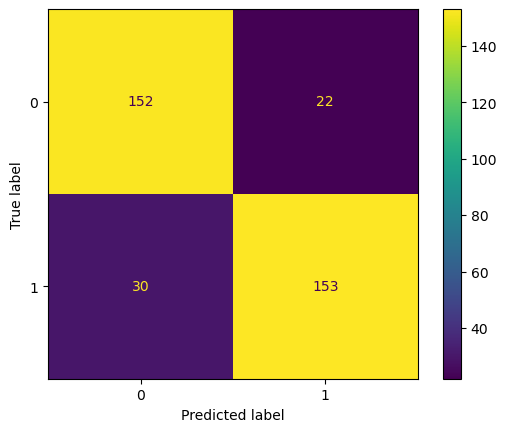

In [154]:
# import metrcs with precision, recall, f1-score
# import confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
y_pred = DT_model.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print (classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
disp.plot()

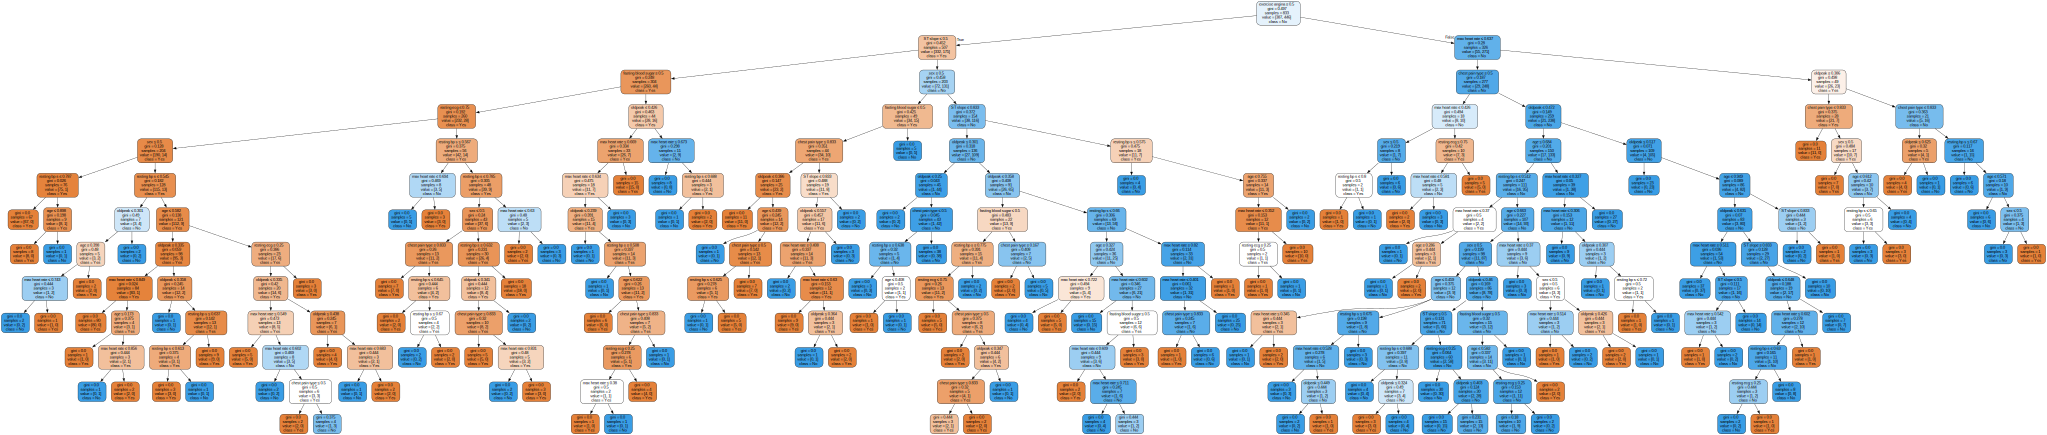

In [135]:
from sklearn.tree import export_graphviz
import graphviz
tree_data = export_graphviz(DT_model,
                           out_file=None,
                           feature_names=df_scaled.columns, 
                           class_names=['Yes','No'], 
                           filled=True,rounded=True,
                           special_characters=True)

graph = graphviz.Source(tree_data)
graph

In [136]:
model = DecisionTreeClassifier(criterion='gini', max_depth=12, max_features = 'log2', min_samples_split = 2, splitter = 'best')

In [137]:
path = model.cost_complexity_pruning_path(x_train, y_train)

In [138]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

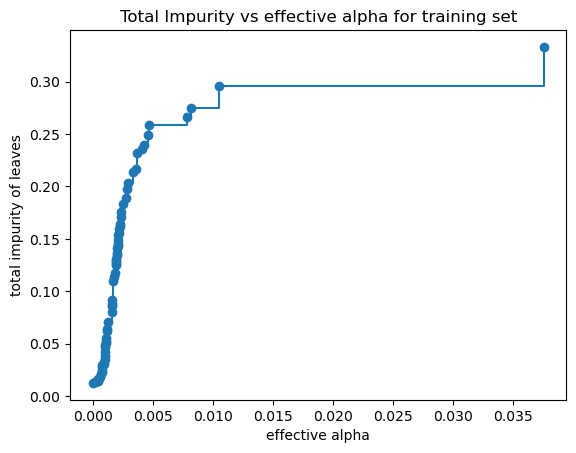

In [139]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [140]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=12, max_features = 'log2', min_samples_split = 2, splitter = 'best', ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.16421062085847188


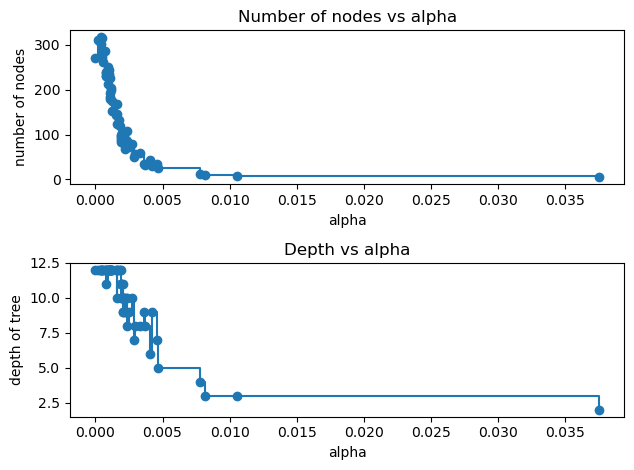

In [141]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

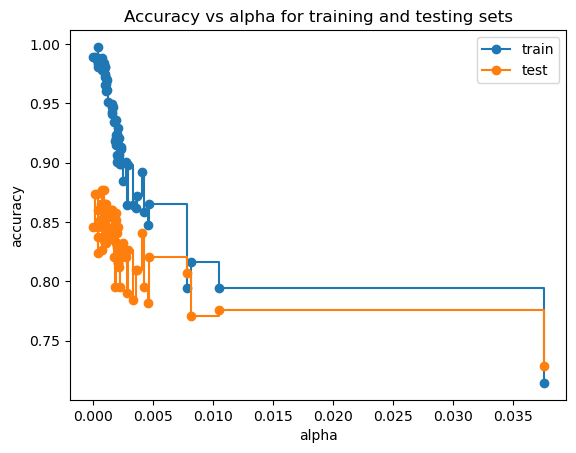

In [142]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [143]:
max(test_scores)

0.876750700280112

In [144]:
# get index of max test score
index = test_scores.index(max(test_scores))
# get the best alpha
best_alpha = ccp_alphas[index]
best_alpha

0.0007558578987150417

In [145]:
# get model from clfs with the best test_score
best_model = clfs[index]

In [146]:
best_model.score(x_test, y_test)

0.876750700280112

In [147]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0007558578987150417, max_depth=12,
                       max_features='log2')

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       174
           1       0.90      0.86      0.88       183

    accuracy                           0.88       357
   macro avg       0.88      0.88      0.88       357
weighted avg       0.88      0.88      0.88       357



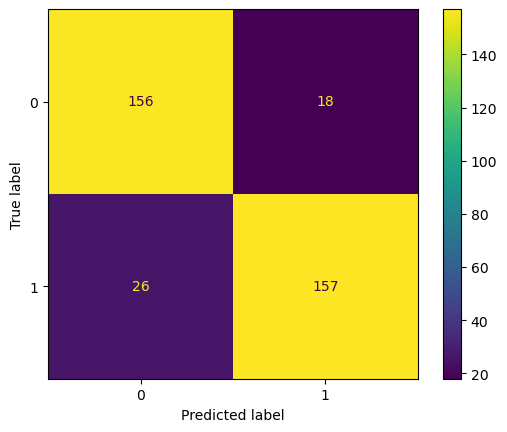

In [155]:
y_pred = best_model.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print (classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
disp.plot()

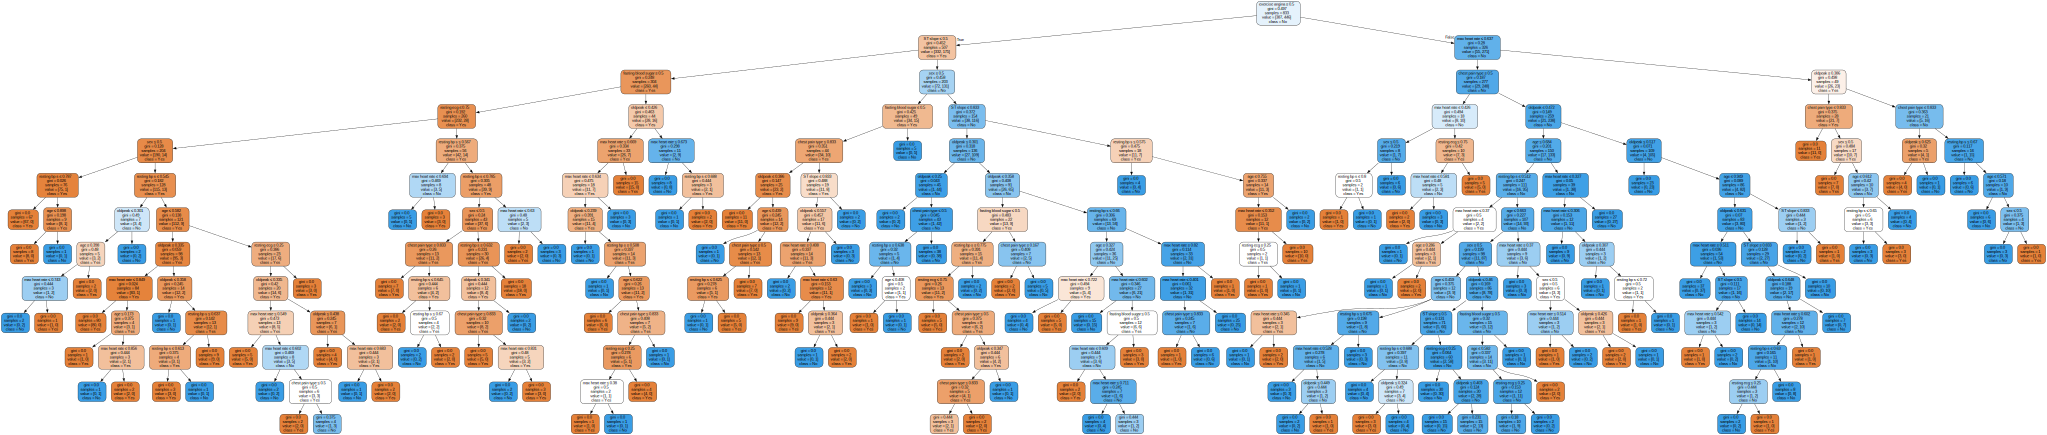

In [148]:
tree_data = export_graphviz(DT_model,
                           out_file=None,
                           feature_names=df_scaled.columns, 
                           class_names=['Yes','No'], 
                           filled=True,rounded=True,
                           special_characters=True)

graph = graphviz.Source(tree_data)
graph